In [ ]:
! pip install numpy opencv-python-headless matplotlib tensorflow nltk

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, RepeatVector
from tensorflow.keras.models import Model, Sequential
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [50]:
import os
import cv2

# Function to resize images (adjust as per your needs)
def resize_image(img, target_size=(224, 224)):
    return cv2.resize(img, target_size)

# Function to load data and images
def load_data(image_folder, caption_file):
    image_paths, captions = [], []
    imgs = []
    with open(caption_file, 'r') as f:
        for line in f:
            line = line.strip().split(',')  # Assuming CSV format, adjust if needed
            image_name, caption = line[0], line[1]
            image_path = os.path.join(image_folder, image_name)
            image_paths.append(image_path)
            captions.append(caption)
            
            try:
                img = cv2.imread(image_path)
                if img is None:
                    raise ValueError(f"Image at {image_path} is not valid.")
                
                img = resize_image(img)  # Resize image to the required dimensions (224x224)
                imgs.append(img)
            except Exception as e:
                # Skip the image if it cannot be loaded or processed
                continue
    
    return imgs, image_paths, captions

In [51]:
# Function to resize images to match model input size (224x224 for VGG16)
def resize_image(image):
    return cv2.resize(image, (224, 224))  # Resize to the size expected by the CNN model

# Function to extract features from images using pre-trained VGG16 model
def extract_features(image, cnn_model):
    image = np.expand_dims(image, axis=0)  # Expand dims to simulate batch
    return cnn_model.predict(image)

# Function to build a captioning model using LSTM
def build_captioning_model(vocab_size, max_caption_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_caption_length))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

# Function to evaluate BLEU score for caption generation
def evaluate_bleu(reference, candidate):
    reference = [reference]  # NLTK BLEU expects list of references
    return sentence_bleu(reference, candidate)

In [52]:
# Loading image paths and captions
image_folder = r'C:\Users\Priyamvadha Pradeep\Desktop\DL Mid Model\archive (2)\train'
caption_file = r'C:\Users\Priyamvadha Pradeep\Desktop\DL Mid Model\archive (2)\captions.txt'
imgs, image_paths, captions = load_data(image_folder, caption_file)

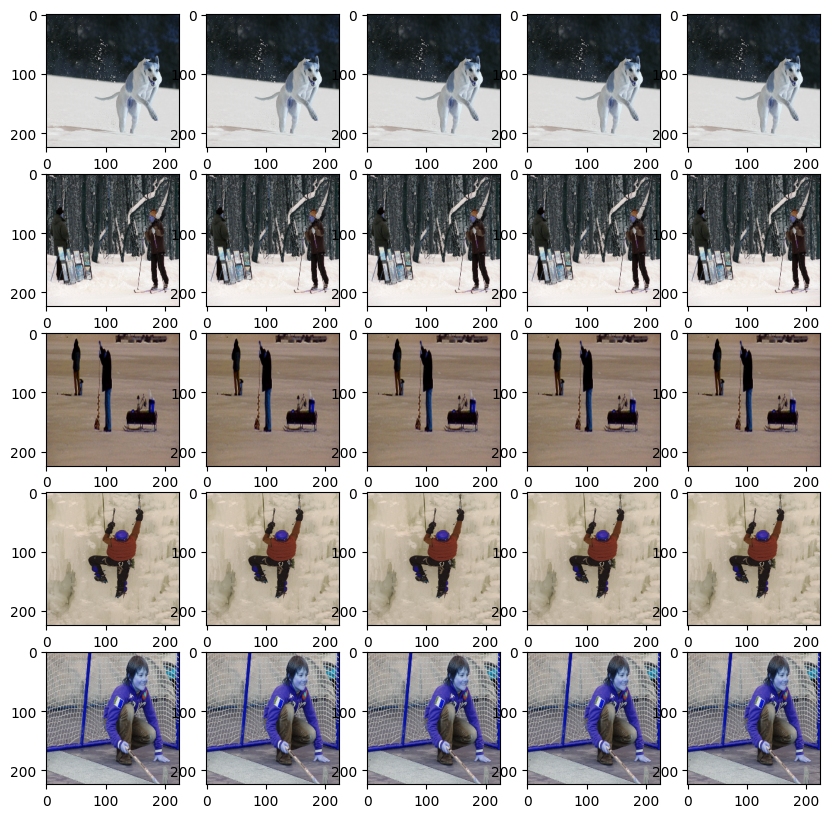

In [53]:
# Visualize some images
fig = plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(imgs[i])
plt.show()

In [57]:
# Define input shape
vocab_size = 10000  # Example vocab size (total unique words or tokens)
embedding_dim = 128  # Embedding dimension
max_sequence_length = 100  # Length of input sequences (e.g., number of words in each text)

# Create the model
model = Sequential()

# Add the Embedding layer
# The input_dim is the vocab_size, output_dim is embedding_dim, input_length is the max sequence length
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Add an LSTM layer
model.add(LSTM(64))  # LSTM with 64 units

# Add a Dense layer for output
model.add(Dense(1, activation='sigmoid'))  # For binary classification (change activation if necessary)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Build the model by passing a dummy input shape (this ensures that the layers are initialized correctly)
model.build((None, max_sequence_length))  # None for batch size (dynamic batch)

# Print the model summary to check the parameters
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Dummy data for demonstration
image = np.random.rand(224, 224, 3)  # Dummy image data
caption = np.random.randint(1, vocab_size, (1, max_caption_length))

# Extract features from the image
image_features = extract_features(image, cnn_model)
print("Extracted Image Features:", image_features.shape)

# Train the model (with dummy data for demonstration)
captioning_model.fit(caption, np.random.rand(1, max_caption_length, vocab_size), epochs=10, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
Extracted Image Features: (1, 7, 7, 512)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3474.2109
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3474.1667
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3474.1323
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3474.1094
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3474.1047
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3474.1294
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3474.2102
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3474.4116
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3474.9019
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3476.0859


In [56]:
# Example reference and generated captions for BLEU evaluation
reference_captions = [
    ["a", "sample", "caption", "of", "an", "image"],
    ["another", "description", "of", "the", "image", "content"]
]
dummy_generated_caption = ["this", "is", "a", "generated", "caption"]

# Calculate BLEU score for the generated caption
bleu_score = evaluate_bleu(reference_captions[0], dummy_generated_caption)
print("BLEU score for the generated caption:", bleu_score)

BLEU score for the generated caption: 1.1862177682648818e-231
